In [59]:
import pandas
import seaborn

In [26]:
data: pandas.DataFrame = pandas.concat(
    [
        pandas.read_parquet("../experiments/01--Naive-Personas-Survey/data/cross_evaluation.parquet"), 
        pandas.read_parquet("../experiments/02--Value-Driven-Personas/data/cross_evaluation.parquet")
    ], 
    keys=['naive', 'value-driven'],
    names=["method"]
)
data

sample                                anonymous                         \
group                                   liberal  moderate conservative   
method       model       persona                                         
naive        llama3.1:8b liberal       0.389333  0.622000     0.946000   
                         moderate      0.475333  0.244000     0.444000   
                         conservative  1.008000  0.758000     0.754000   
             llama2:70b  liberal       0.507333  0.557333     0.590667   
                         moderate      0.754000  0.280000     0.232000   
...                                         ...       ...          ...   
value-driven qwen:72b    moderate      1.018667  0.768667     0.764667   
                         conservative  1.538667  1.288667     1.284667   
             qwen2:72b   liberal       0.248667  0.685333     1.009333   
                         moderate      0.616667  0.426667     0.424000   
                         conservative  0.996000  0.530000     0.344667   

sample                                       us                         \
group                                   liberal  moderate conservative   
method       model       persona                                         
naive        llama3.1:8b liberal       0.864000  0.619333     1.232000   
                         moderate      1.075333  0.705333     0.720667   
                         conservative  1.608000  1.238000     0.888000   
             llama2:70b  liberal       0.452667  0.374667     0.804667   
                         moderate      0.854000  0.288000     0.366000   
...                                         ...       ...          ...   
value-driven qwen:72b    moderate      1.618667  1.248667     0.898667   
                         conservative  2.138667  1.768667     1.418667   
             qwen2:72b   liberal       0.440667  0.645333     1.295333   
                         moderate      0.636667  0.166667     0.583333   
                         conservative  1.096000  0.546000     0.353333   

sample                                   korean                         
group                                   liberal  moderate conservative  
method       model       persona                                        
naive        llama3.1:8b liberal       0.809333  0.779333     0.852000  
                         moderate      0.815333  0.685333     0.595333  
                         conservative  1.348000  1.218000     1.128000  
             llama2:70b  liberal       0.392667  0.482667     0.572667  
                         moderate      0.418000  0.248000     0.194000  
...                                         ...       ...          ...  
value-driven qwen:72b    moderate      1.358667  1.228667     1.138667  
                         conservative  1.878667  1.748667     1.658667  
             qwen2:72b   liberal       0.535333  0.765333     0.915333  
                         moderate      0.336667  0.300000     0.290000  
                         conservative  0.636000  0.479333     0.416000  

[72 rows x 9 columns]

In [56]:
subset: pandas.DataFrame = (
    data
    .melt(ignore_index=False)
    .reset_index()
    .pipe(lambda _df: _df[_df["persona"] == _df["group"]])
    .rename(columns={"value": "distance", "method": "prompting"})
)
subset

,prompting,model,persona,sample,group,distance
0,naive,llama3.1:8b,liberal,anonymous,liberal,0.389333
3,naive,llama2:70b,liberal,anonymous,liberal,0.507333
6,naive,llama3:70b,liberal,anonymous,liberal,0.488000
9,naive,llama3.1:70b,liberal,anonymous,liberal,0.610667
12,naive,mistral:7b,liberal,anonymous,liberal,0.813521
...,...,...,...,...,...,...
635,value-driven,phi3:14b,conservative,korean,conservative,0.997333
638,value-driven,gemma:7b,conservative,korean,conservative,0.344633
641,value-driven,gemma2:27b,conservative,korean,conservative,0.384667
644,value-driven,qwen:72b,conservative,korean,conservative,1.658667


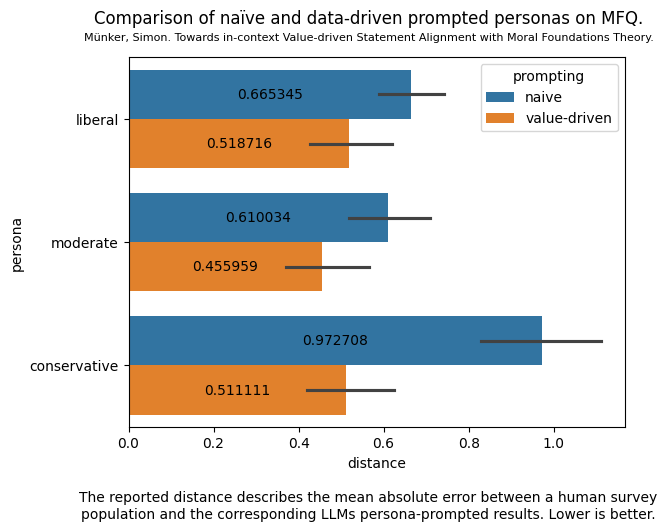

In [101]:
ax = seaborn.barplot(
    data=subset,
    x="distance",
    y="persona",
    hue="prompting"
)

for container in ax.containers:
    ax.bar_label(container, label_type="center")

ax.figure.suptitle("Comparison of naïve and data-driven prompted personas on MFQ.")
ax.figure.text(0.5, -0.075, "The reported distance describes the mean absolute error between a human survey population and the corresponding LLMs persona-prompted results. Lower is better.", wrap=True, horizontalalignment='center', fontsize=10)
ax.figure.text(0.5, 0.915, "Münker, Simon. Towards in-context Value-driven Statement Alignment with Moral Foundations Theory.", wrap=True, horizontalalignment='center', fontsize=8)
ax.get_figure().savefig("naive_vs_value_driven.pdf", bbox_inches="tight")